<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Материалы Юстины Ивановой: https://github.com/yustinaivanova/netology_statistics_february_20

# Домашняя работа №3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics


Загрузить датасет по url:


In [2]:
import ssl

In [101]:
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
# df = pd.read_csv('world-happiness-report-2019.csv')
df = pd.read_csv(url)

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [102]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [103]:
freedom = df['Freedom'].dropna()

Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

/Users/victoriabelavina/Netology/env/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/victoriabelavina/Netology/env/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


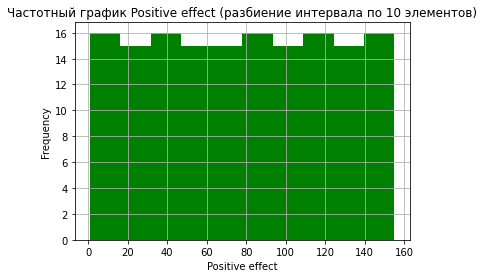

In [104]:
# plt.hist - строит частотный график выборки, разбивая значения выборки на равные интервалы
#это равномерное распределение
n, bins, patches = plt.hist(df['Positive affect'], 10, facecolor='g')

plt.xlabel('Positive effect')
plt.ylabel('Frequency')
plt.title('Частотный график Positive effect (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()

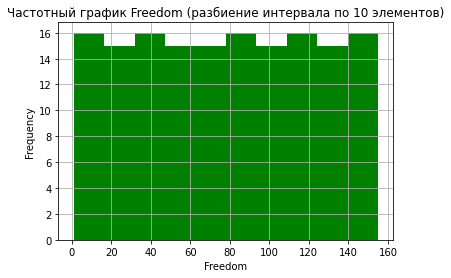

In [105]:
# plt.hist - строит частотный график выборки, разбивая значения выборки на равные интервалы
n, bins, patches = plt.hist(df['Freedom'], 10, facecolor='g')

plt.xlabel('Freedom')
plt.ylabel('Frequency')
plt.title('Частотный график Freedom (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()

## Оба графика представляют равномерное распределение

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [8]:
statistics.mean(df['Freedom'].dropna())

78.0

In [9]:
freedom = df['Freedom']

In [10]:
sum(freedom)/len(freedom)

nan

In [11]:
sum(df['Freedom'].dropna()/len(df['Freedom'].dropna()))

78.00000000000003

In [12]:
print('Медиана: ', statistics.median(df['Freedom']))

Медиана:  71.0


In [13]:
# Извлекаем duration 
freedom = df['Freedom']

# Находим их количество
num_freedom = len(freedom)

# Сортируем в порядке возрастания
sorted_freedom = sorted(freedom)

# Ищем индекс среднего элемента
# если количество элементов четное, то берем среднее двух элементов в середине
middle = (num_freedom // 2)
if num_freedom%2==0:
    result = (sorted_freedom[middle-1] + sorted_freedom[middle])/2
else:
    result = sorted_freedom[middle]
# Находим медиану
print('Медиана: ', result)

Медиана:  71.0


In [14]:
print('Значение моды: ', statistics.mode(freedom))

StatisticsError: no unique mode; found 156 equally common values

In [15]:
min(freedom)

1.0

In [16]:
max(freedom)

155.0

In [17]:
#выбросы
freedom.isnull().sum()

1

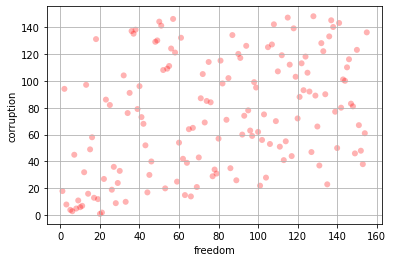

In [18]:
#для себя
corruption = df['Corruption']
fig, ax = plt.subplots()
ax.scatter(freedom, corruption, c='red', alpha=0.3, edgecolors='none')

ax.grid(True)
plt.xlabel('freedom')
plt.ylabel('corruption')
plt.show()

In [35]:
#стандартное отклонение - standard deviation
statistics.pstdev(freedom.dropna())

44.74371464239419

In [37]:
def stdev(nums):
    diffs = 0
    # считаем среднее значение
    avg = sum(nums)/len(nums)
    for n in nums:
        # считаем сумму квадратичных отклонений
        diffs += (n - avg)**(2)
    # считаем корень среднеквадратичного значения
    return (diffs/(len(nums)-1))**(0.5)

print(stdev(freedom.dropna()))

44.88875137492688


In [21]:
freedom.std(ddof = 0)

44.74371464239419

In [38]:
#дисперсия  
statistics.pvariance(freedom.dropna())

2002.0

In [23]:
freedom.var(ddof = 0)

2002.0

In [39]:
def dispersia(nums):
    diffs = 0
    # считаем среднее значение
    avg = sum(nums)/len(nums)
    for n in nums:
        # считаем сумму квадратичных отклонений
        diffs += (n - avg)**(2)
    # считаем среднеквадратичного значения
    return (diffs/(len(nums)-1))

print(dispersia(freedom.dropna()))

2015.0


In [25]:
#размах
freedom_range = max(freedom) - min(freedom)
print(freedom_range)

154.0


Почему нельзя найти моду?

## потому что все значения представлены в датасете один раз

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

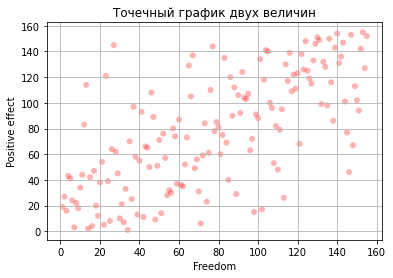

In [27]:
freedom = df['Freedom']
positive_effect = df['Positive affect']
fig, ax = plt.subplots()
ax.scatter(freedom, positive_effect, c='red', alpha=0.3, edgecolors='none')

ax.grid(True)
plt.xlabel('Freedom')
plt.ylabel('Positive effect')
plt.title('Точечный график двух величин')
plt.show()

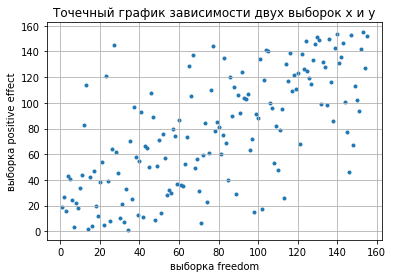

In [28]:
freedom = df['Freedom']
positive_effect = df['Positive affect']
plt.xlabel('выборка freedom')
plt.ylabel('выборка positive effect')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(freedom, positive_effect, marker='.')

# Корелляция Пирсона


Коэффициент корреляции Пирсона: 0.6817698430601656


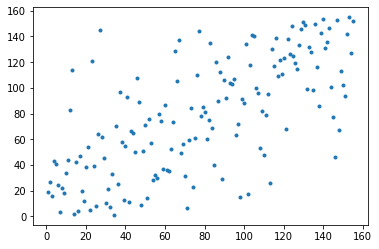

In [30]:
from scipy.stats import pearsonr
x = df['Freedom'].dropna()
y = df['Positive affect'].dropna()

corr, p_value = pearsonr(x, y)
plt.scatter(x, y, marker='.')
print('Коэффициент корреляции Пирсона:', corr)

0.6817698430601656 говорит о том, что существует линейная зависимость между параметрами. 

Нормализовать данные колонки Freedom (централизация + масштабирование)

из лекции: 
    считаем среднее значение, вычитаем среднее из каждого эл-та, считаем дисперсию и делим каждый из эл-ов на дисперсию

In [53]:
freedom = df['Freedom'].dropna()
print(statistics.mean(freedom))

78.0


In [54]:
centered_freedom = freedom - statistics.mean(freedom)
print(statistics.mean(centered_freedom))

0.0


In [55]:
'''
Это правильно? я это из слов в слекции взяла: считаем среднее значение, 
вычитаем среднее из каждого эл-та, считаем дисперсию и делим каждый из эл-ов на дисперсию
'''
centered_freedom = (freedom.dropna() - statistics.mean(freedom.dropna()))/statistics.pvariance(freedom.dropna())
centered_freedom

0     -0.036464
1     -0.035964
2     -0.037463
3     -0.035465
4     -0.029471
         ...   
151   -0.028472
152    0.000000
153    0.038462
154    0.027473
155    0.037962
Name: Freedom, Length: 155, dtype: float64

In [56]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

normalized_freedom = min_max_scaler.fit_transform(np.array(centered_freedom).reshape(-1, 1))
print(min(normalized_freedom))
print(max(normalized_freedom))

[-1.]
[1.]


Построить матрицу корреляций для всех колонок таблицы

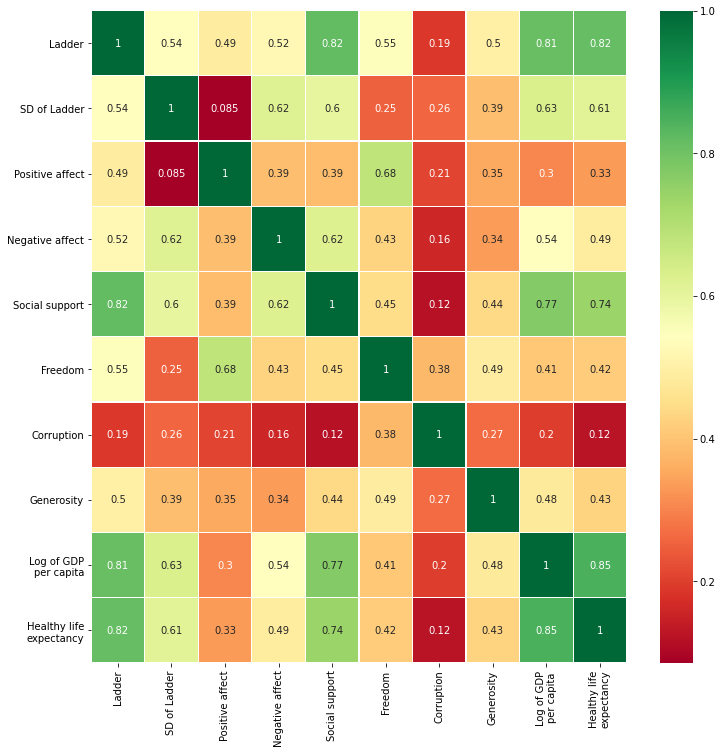

In [57]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()

Загрузить таблицу цен на авокадо: 

In [59]:
df1=pd.read_csv('data/avocado.csv')
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

## Нормальное распределение

In [71]:
average_price = df1['AveragePrice']

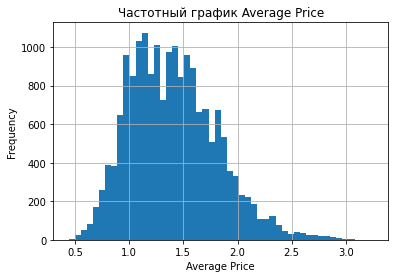

In [107]:
plt.hist(average_price,50)
plt.xlabel('Average Price')
plt.ylabel('Frequency')
plt.title('Частотный график Average Price')
plt.grid(True)
plt.show()

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

Нормируем данные

In [70]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

np_scaled = min_max_scaler.fit_transform(df[['AveragePrice', '4046','4225', '4770']])
df_norm = pd.DataFrame(np_scaled)
df_norm.head()

,0,1,2,3
0,0.316726,0.000046,0.002660,0.000019
1,0.323843,0.000030,0.002181,0.000023
2,0.174377,0.000035,0.005332,0.000051
3,0.227758,0.000050,0.003516,0.000029
4,0.298932,0.000041,0.002142,0.000030


## Ищем корреляцию между значениями

**Цена к продажам**

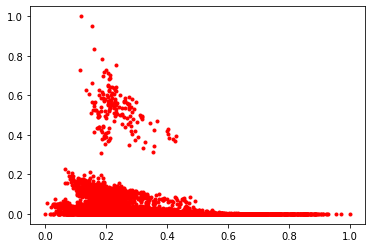

In [83]:
price = df_norm[0].dropna()
a_4046 = df_norm[1].dropna()
plt.plot( price, a_4046, 'r.')
plt.show()

In [84]:
corr, p_value = pearsonr(price, a_4046)
print(corr)

-0.20831704848788482


**Продажа к цене**

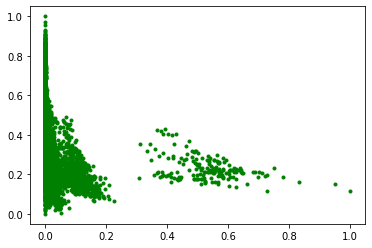

In [97]:
price = df_norm[0].dropna()
a_4046 = df_norm[1].dropna()
plt.plot( a_4046,price, 'g.')
plt.show()

In [90]:
corr, p_value = pearsonr(a_4046, price)
print(corr)

-0.20831704848788482


**Цена к продажам**

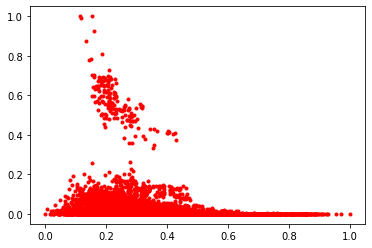

In [85]:
price = df_norm[0].dropna()
a_4225 = df_norm[2].dropna()
plt.plot( price, a_4225, 'r.')
plt.show()

In [86]:
corr, p_value = pearsonr(price, a_4225)
print(corr)

-0.1729277725093354


**Продажа к цене**

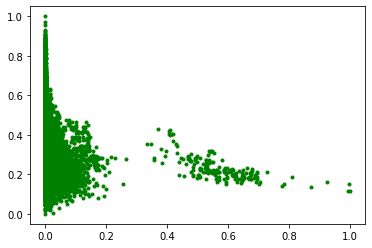

In [96]:
price = df_norm[0].dropna()
a_4225 = df_norm[2].dropna()
plt.plot( a_4225, price, 'g.')
plt.show()

**Цена к продажам**

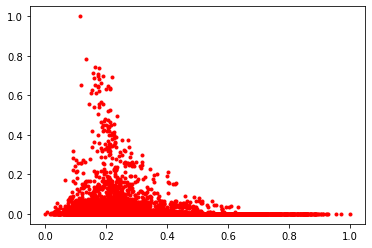

In [87]:
price = df_norm[0].dropna()
a_4770 = df_norm[3].dropna()
plt.plot( price, a_4770, 'r.')
plt.show()

In [88]:
corr, p_value = pearsonr(price, a_4770)
print(corr)

-0.17944598397975625


**Продажа к цене**

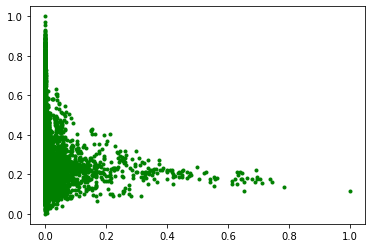

In [98]:
price = df_norm[0].dropna()
a_4770 = df_norm[3].dropna()
plt.plot( a_4770, price, 'g.')
plt.show()

In [92]:
corr, p_value = pearsonr(a_4770,price)
print(corr)

-0.17944598397975625


## чем больше кол-во проданных авокадо, тем стабильнее цена на авокадо